## Beta-Bernoulli Model

### 1. Model Definition

#### **Notation**

- $N$: Total number of Bernoulli trials
- $y_i$: Outcome of the $i$-th trial, where $y_i \in \{0,1\}$
- $k = \sum_{i=1}^N y_i$: Total number of successes observed
- $\theta \in [0,1]$: Probability of success on each trial

#### **Definition**

We observe $N$ Bernoulli trials, resulting in $k$ successes. We assume each trial’s probability of success is $\theta$. Our goal is to infer $\theta$.

---

### 2. Prior

#### **Notation**

- $\alpha, \beta > 0$: Shape parameters of the Beta prior distribution.

#### **Beta Prior**

We place a Beta prior on $\theta$:
$$
  p(\theta) 
  \;=\; \mathrm{Beta}(\theta \mid \alpha, \beta) 
  \;=\; \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\,\Gamma(\beta)}
        \,\theta^{\alpha - 1} \,(1-\theta)^{\beta - 1}
$$

This choice of prior is conjugate to the Bernoulli likelihood, ensuring the posterior also follows a Beta distribution.

---

### 3. Likelihood

#### **Notation**

- $p(D \mid \theta)$: Probability of data $D$ (i.e., the observed outcomes) given $\theta$.
- $k$: Number of successes in $N$ trials.

#### **Bernoulli Likelihood**

For $k$ successes and $N-k$ failures, the Bernoulli likelihood is
$$
  p(D \mid \theta) 
  \;=\; \theta^{k}\,(1-\theta)^{(N - k)}
$$

---

### 4. Posterior

#### **Notation**

- $p(\theta \mid D)$: Posterior distribution of $\theta$ after observing data $D$.
- $p(D)$: Marginal likelihood (normalizing constant).
- $\propto$: “Proportional to,” omitting constant factors that do not depend on $\theta$.

#### **Bayes’ Theorem and Posterior Form**

By Bayes’ Theorem,

$$
  p(\theta \mid D) 
  \;=\; \frac{p(D \mid \theta)\,p(\theta)}{p(D)}
$$
Substitute the Bernoulli likelihood and the Beta prior:
$$
  p(\theta \mid D) 
  \;\propto\; \theta^{k}\,(1-\theta)^{(N - k)} 
               \;\times\; \theta^{\alpha - 1}\,(1-\theta)^{\beta - 1}
$$
Combine the exponents of $\theta$ and $(1-\theta)$:
$$
  p(\theta \mid D) 
  \;\propto\; \theta^{(\alpha - 1) + k}
              \,(1-\theta)^{(\beta - 1) + (N - k)}
$$
Recognizing the Beta kernel, we conclude:
$$
  p(\theta \mid D) 
  = \mathrm{Beta}\Bigl(\theta \;\bigm|\; \alpha + k,\;\beta + (N - k)\Bigr)
$$

Hence, the posterior is another Beta distribution with **updated** shape parameters $\alpha + k$ and $\beta + (N - k)$.

---

### 2. Sympy Verification

Below, we symbolically represent the **unnormalized** posterior and numerically confirm that the integral over $[0,1]$ matches the Beta function normalization.

#### **Notation**

- $\alpha, \beta > 0$: Beta prior parameters.
- $N$: Number of trials.
- $k$: Number of observed successes.
- $\theta$: Success probability.

#### **Unnormalized Posterior**

$$
  \text{posterior}_\text{unnorm}(\theta) 
  \;=\; \bigl[\theta^{\alpha - 1}\,(1 - \theta)^{\beta - 1}\bigr]
         \;\times\;
         \bigl[\theta^{k}\,(1 - \theta)^{(N - k)}\bigr].
$$

When integrated over $\theta\in[0,1]$, it should yield the normalizing constant that turns this expression into a valid Beta density with parameters $\alpha + k$ and $\beta + (N-k)$.

In [1]:
import mpmath
import sympy

theta = sympy.Symbol("theta", positive=True)
alpha_v, beta_v = 2, 3  # Values for alpha and beta
N_v, k_v = 5, 2  # Observed 5 trials, 2 successes

# Unnormalized posterior expression
expr_symbolic = (
    theta ** (alpha_v - 1)
    * (1 - theta) ** (beta_v - 1)
    * theta ** (k_v)
    * (1 - theta) ** (N_v - k_v)
)

f = sympy.lambdify(theta, expr_symbolic, "mpmath")

# Numeric integration from 0 to 1
res = mpmath.quad(f, [0, 1])
print("Unnormalized integral =", res)

Unnormalized integral = 0.00198412698412698


**Expected Result**  

From the Beta conjugacy, the posterior’s normalizing constant for $\alpha_v=2, \beta_v=3, N_v=5, k_v=2$ is:

$$
  \mathrm{B}(\alpha_v + k_v,\, \beta_v + (N_v - k_v)) 
  \;=\; \mathrm{B}(4,6)
$$
reduces to $1/504$. For concreteness, we use the fact that:

$$
  \mathrm{B}(x,y) \;=\; \frac{\Gamma(x)\,\Gamma(y)}{\Gamma(x+y)},
  \quad \text{and} 
  \quad \Gamma(n+1)=n! \text{ for positive integers } n.
$$

Substitute $\mathrm{B}(4,6)$:

$$
\mathrm{B}(4,6) 
\;=\; \frac{\Gamma(4)\,\Gamma(6)}{\Gamma(4+6)}
\;=\; \frac{\Gamma(4)\,\Gamma(6)}{\Gamma(10)}.
$$

Convert gamma functions to factorials:

- $\Gamma(4) = 3! = 3 \times 2 \times 1 = 6.$  
- $\Gamma(6) = 5! = 5 \times 4 \times 3 \times 2 \times 1 = 120.$  
- $\Gamma(10) = 9! = 9 \times 8 \times 7 \times 6 \times 5 \times 4 \times 3 \times 2 \times 1 = 362{,}880$

So,

$$
  \frac{\Gamma(4)\,\Gamma(6)}{\Gamma(10)} 
  \;=\; \frac{3!\,5!}{9!} 
  \;=\; \frac{6 \times 120}{362{,}880}
$$

Simplify numerically:

$$
  \frac{6 \times 120}{362{,}880} 
  \;=\; \frac{720}{362{,}880}
$$

Recognizing $362{,}880 / 720 = 504$, we have

$$
  \frac{720}{362{,}880} 
  \;=\; \frac{1}{504}
$$

Hence, when we numerically integrate the **unnormalized** posterior over $\theta \in [0,1]$ and get $0.001984...$, we match the exact fraction $\tfrac{1}{504}$. This confirms the **Beta conjugacy** result:

$$
  \int_0^1 \text{posterior}_\text{unnorm}(\theta)\,d\theta 
  \;=\; \frac{1}{504}
$$

## Impact of Different Priors on the Posterior in a Beta-Bernoulli Model

### Model Setup

* **Prior**: Beta distribution with various parameterizations.
* **Likelihood**: Bernoulli trials with observed successes and failures.
* **Posterior**: Updated Beta distribution via conjugacy.

### 🔢 Priors Explored

<center>

| Prior         | Description                              |
| ------------- | ---------------------------------------- |
| Beta(1,1)     | Uniform, non-informative                 |
| Beta(2,2)     | Weakly informative, centered at 0.5      |
| Beta(0.5,0.5) | Informative, favoring extremes (0 and 1) |
| Beta(5,1)     | Informative, favoring high success prob. |
| Beta(1,5)     | Informative, favoring low success prob.  |
| Beta(10,10)   | Strongly centered around 0.5             |

</center>

In [2]:
from typing import List

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import numpy.typing as npt
import polars as pl
from beta_priors import (
    BetaParams,
    DataScenario,
    make_density_figure,
    make_predictive_figure,
    report_table,
)

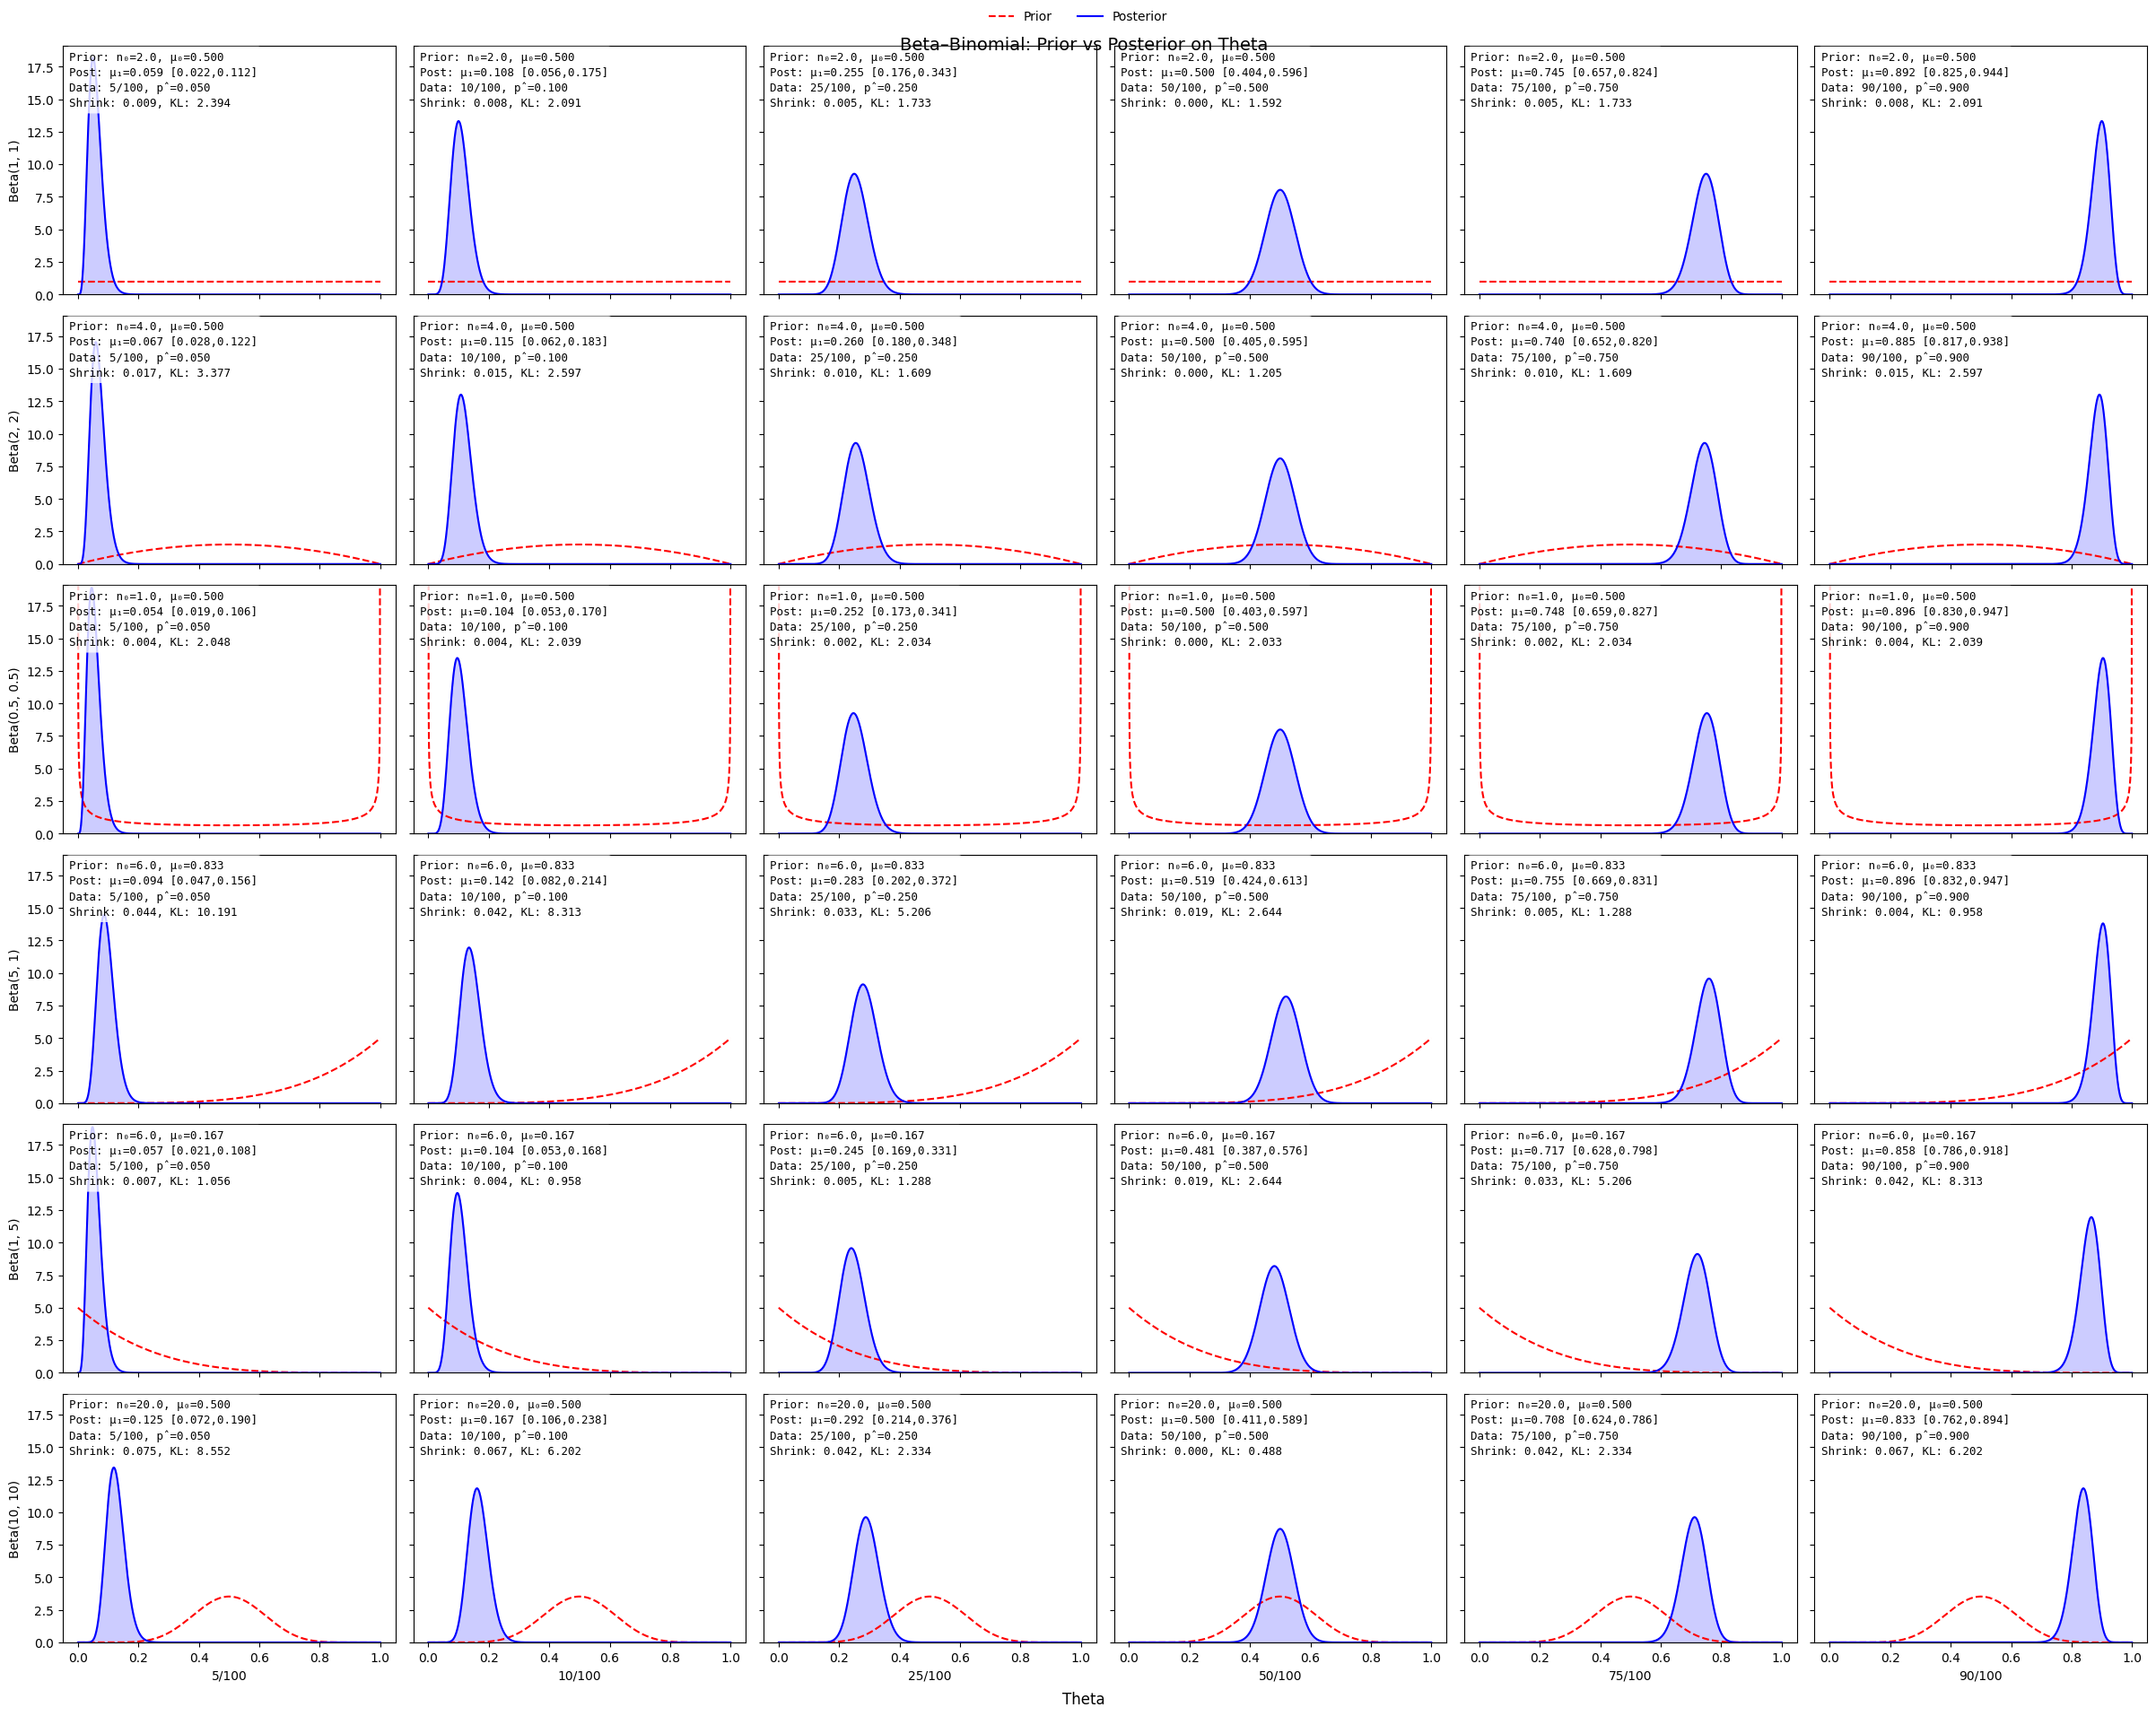

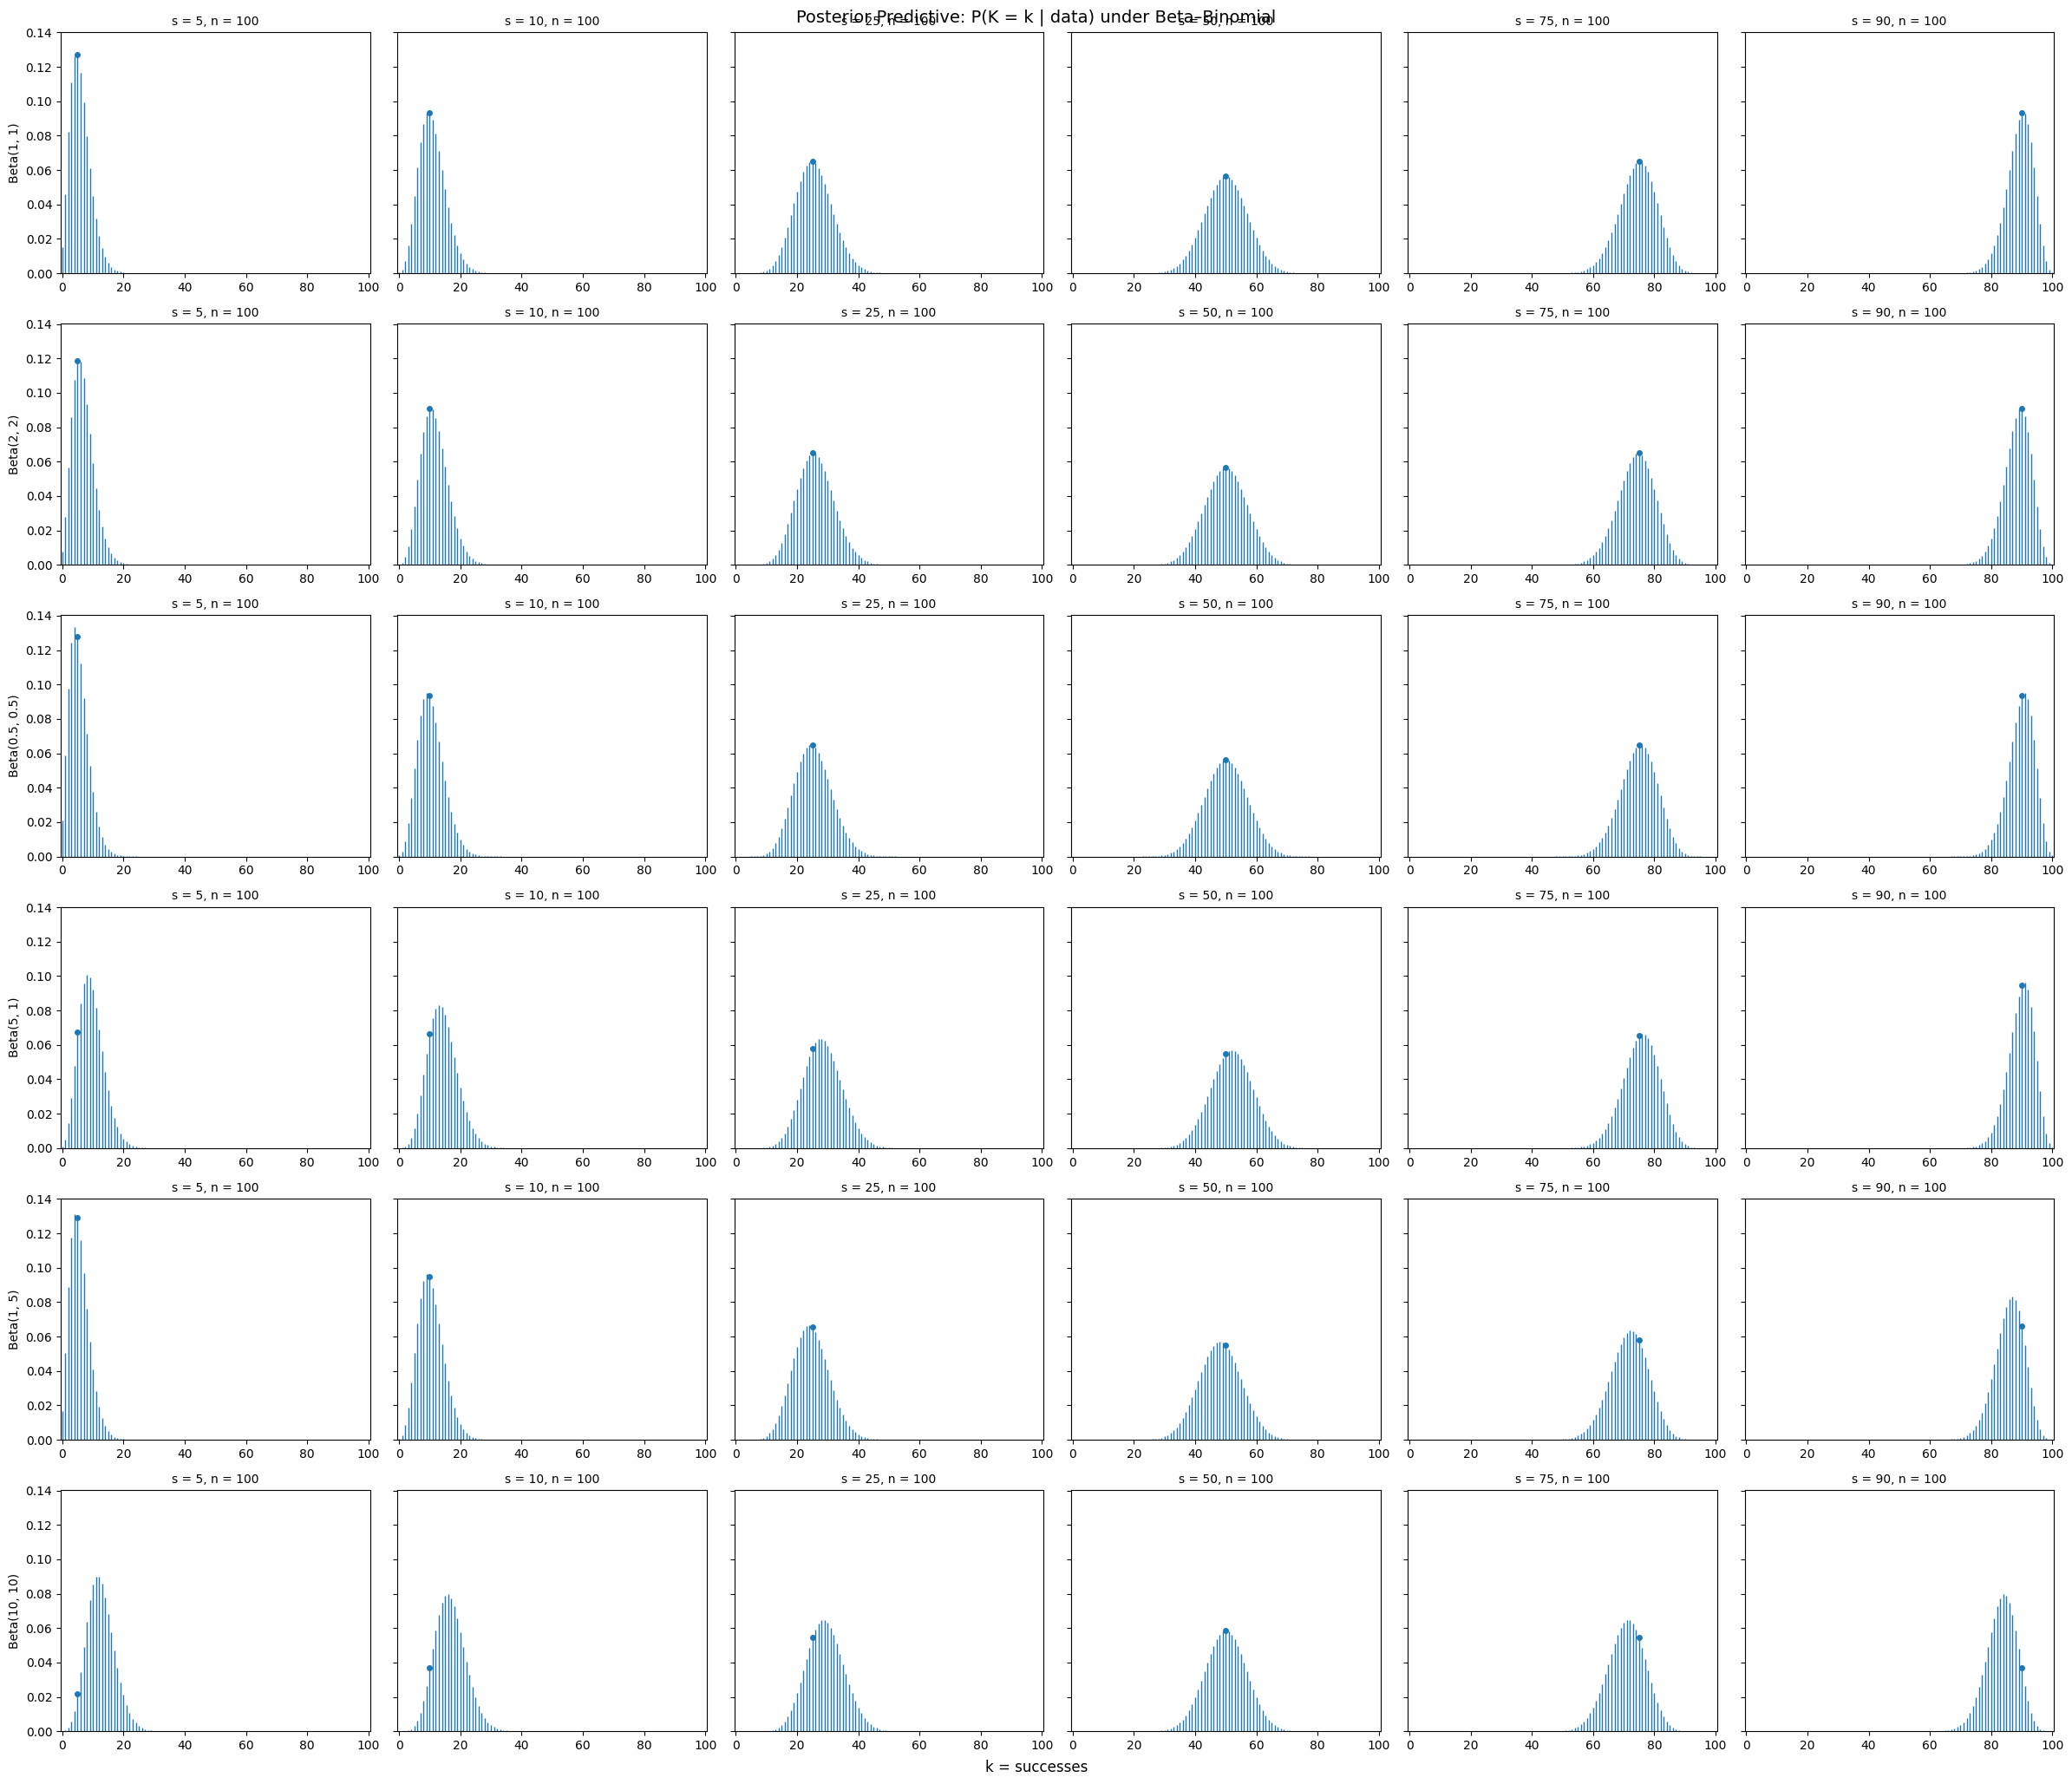

In [5]:
# Priors
priors: List[BetaParams] = [
    BetaParams(1.0, 1.0),  # Uniform
    BetaParams(2.0, 2.0),  # Weakly informative, symmetric
    BetaParams(0.5, 0.5),  # Favors extremes
    BetaParams(5.0, 1.0),  # Favors high probabilities
    BetaParams(1.0, 5.0),  # Favors low probabilities
    BetaParams(10, 10),  # Strongly informative, symmetric
]

# Data scenarios, including edge cases s = 0 and s = n
data_scenarios: List[DataScenario] = [
    DataScenario(5, 100),
    DataScenario(10, 100),
    DataScenario(25, 100),
    DataScenario(50, 100),
    DataScenario(75, 100),
    DataScenario(90, 100),
]

# Grid for θ densities; avoid exact 0 and 1 to prevent boundary singularities
eps: float = 1e-6
n_values: int = 1000
x: npt.NDArray[np.floating] = np.linspace(eps, 1.0 - eps, n_values)

_ = make_density_figure(priors, data_scenarios, x, output_path=None)
_ = make_predictive_figure(priors, data_scenarios, output_path=None)

### Prior-by-Prior Analysis

1. **Uniform prior (Beta(1, 1))**

   * Represents no prior knowledge; posterior is mainly data-driven.
   * With more data, posterior becomes concentrated near observed proportion of successes.

2. **Weakly Informative prior (Beta(2, 2))**

   * Slightly informative, centered at 0.5.
   * Pulls posterior toward 0.5 when data is sparse.
   * Influence diminishes as sample size increases.

3. **Informative prior favoring extremes (Beta(0.5, 0.5))**

   * Has high variance, favoring 0 or 1.
   * With limited data, posterior exhibits preference for extreme values.

4. **Informative prior favoring high probabilities (Beta(5, 1))**

   * Strong belief in high success probability.
   * Posterior remains biased toward higher values when data is small, even if data contradicts prior.

5. **Informative prior favoring low probabilities (Beta(1, 5))**

   * Strong belief in low success probability.
   * Posterior remains skewed toward low values when data is scarce, updating with more trials.

6. **Strongly centered prior (Beta(10, 10))**

   * Concentrated around 0.5 with low variance.
   * Requires substantial data to shift posterior away from 0.5.
   * Reflects strong prior conviction in balanced success and failure rates.

### KL Divergence Interpretation

* **Definition**: Kullback–Leibler (KL) divergence measures how different two probability distributions are. Here, it quantifies how much the posterior distribution diverges from the prior.
* **Interpretation in Beta–Bernoulli context**:

  * A **larger KL divergence** means the posterior moved substantially away from the prior, indicating that the data strongly contradicted the prior belief.
  * A **smaller KL divergence** means the posterior remains close to the prior, suggesting the data aligned with prior assumptions or was insufficiently strong to alter them significantly.
* **Asymmetry**: KL is not symmetric, so $KL(\text{Posterior} \| \text{Prior})$ is not the same as $KL(\text{Prior} \| \text{Posterior})$. The reported measure always reflects the inefficiency of assuming the prior when the posterior is true.

### General Takeaways

* **More data reduces prior influence**: Posterior relies increasingly on observed data as trials accumulate.
* **Stronger priors require more data to overcome**: Informative priors can dominate posterior beliefs in small-sample settings.
* **Prior selection matters in low-data regimes**: When sample sizes are small, choice of prior significantly influences inference.
* **KL divergence as a diagnostic**: KL divergence provides a quantitative way to assess how much the data has shifted beliefs away from the prior.

In [6]:
report: pl.DataFrame = report_table(priors, data_scenarios)

with pl.Config(tbl_rows=len(report)):
    report

prior,data,prior_mean,prior_ess,post_mean,post_ci_low,post_ci_high,abs(shrink),KL(post||prior)
str,str,f64,f64,f64,f64,f64,f64,f64
"""Beta(1, 1)""","""5/100""",0.5,2.0,0.058824,0.022111,0.111755,0.008824,2.393677
"""Beta(1, 1)""","""10/100""",0.5,2.0,0.107843,0.055637,0.174553,0.007843,2.09063
"""Beta(1, 1)""","""25/100""",0.5,2.0,0.254902,0.175556,0.343348,0.004902,1.733265
"""Beta(1, 1)""","""50/100""",0.5,2.0,0.5,0.403643,0.596357,0.0,1.591645
"""Beta(1, 1)""","""75/100""",0.5,2.0,0.745098,0.656652,0.824444,0.004902,1.733265
"""Beta(1, 1)""","""90/100""",0.5,2.0,0.892157,0.825447,0.944363,0.007843,2.09063
"""Beta(2, 2)""","""5/100""",0.5,4.0,0.067308,0.027759,0.122487,0.017308,3.377162
"""Beta(2, 2)""","""10/100""",0.5,4.0,0.115385,0.061671,0.183057,0.015385,2.596653
"""Beta(2, 2)""","""25/100""",0.5,4.0,0.259615,0.18039,0.347594,0.009615,1.609492
